# Evaluation plots

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
import matplotlib.axes as axes
import matplotlib.ticker as tick

plt.style.use('seaborn-poster')
sns.set_context(rc={"figure.figsize": (120, 60)})
sns.set_style("whitegrid")
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

In [2]:
style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [3]:
base_dir = './CSVs/'
plot_type = 'AverageEval'
num_iterations = 101
game = 'Seaquest'
approaches = ['MultiplicativeLinear', 'MultiplicativeExp', 'Log']
legends = ['Multiplicative, Linear Bins', 'Multiplicative, Exp. Bins', 'Log Approach']
colors = ['steelblue', 'indianred', 'darkseagreen', 'steelblue']
DCOP = 3500  
uncorrected = 1600
alpha_y = 1.0
alpha_y_smoothed = 0.25
lim_x = (1,1.05)
lim_y = (1,1.05)
size_x = 25 
size_y = 11

In [4]:
def plot_results(base_dir, plot_type, num_iterations, game, approaches, 
                 legends, colors, DCOP, uncorrected, alpha_y, alpha_y_smoothed,
                 lim_x, lim_y, size_x, size_y, training_steps = None, smooth_weight = 0.6,
                 loc_legend = "lower right" ):
    if plot_type == 'AverageEval':
        title_x_axis = 'Iteration'
        title_y_axis = 'Average Episode Return'
    elif plot_type == 'MeanOffpolicyness':
        title_x_axis = 'Training Step'
        title_y_axis = 'Average Offpolicyness'
    elif plot_type == 'Entropy':
        title_x_axis = 'Training Step'
        title_y_axis = 'Average Offpolicyness'
                 
    def smooth(scalars, weight):  # Weight between 0 and 1
        last = scalars[0]  # First value in the plot (first timestep)
        smoothed = list()
        for point in scalars:
            smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
            smoothed.append(smoothed_val)                        # Save it
            last = smoothed_val                                  # Anchor the last smoothed value
        return smoothed
    
    def x_fmt(tick_val, pos):
        if tick_val >= 1000000:
            val = int(tick_val)/1000000
            return '{:d} M'.format(int(val))
        elif tick_val > 1000:
            val = int(tick_val) / 1000
            return '{:d} k'.format(int(val))
        else:
            return tick_val
    
    plt.figure(figsize=(size_x, size_y))
    for idx,approach in enumerate(approaches):
        csv_dir = base_dir + plot_type + game + approach + '.csv'
        data_table = np.genfromtxt(csv_dir, delimiter=',')
        x = data_table[1:,1]
        y = data_table[1:,2]
        if training_steps:
            x = x[x<=training_steps]
            y = y[:x.shape[0]]
        else:
            x = x[:num_iterations]
            y = y[:num_iterations]
        y_smoothed = smooth(y, smooth_weight)
        df = pd.DataFrame(y)
        ax = plt.subplot(111)
        if alpha_y_smoothed == 1.:
            ax.plot(x,y,colors[idx], alpha=alpha_y)
            ax.plot(x,y_smoothed, colors[idx], alpha=alpha_y_smoothed, label=legends[idx])
        else:
            ax.plot(x,y,colors[idx], alpha=alpha_y, label=legends[idx])
            ax.plot(x,y_smoothed, colors[idx], alpha=alpha_y_smoothed)
    if DCOP:
        ax.plot(x,[DCOP for i in range(num_iterations)], 'k', linestyle='--', label='DCOP-TD')
    if uncorrected:
        ax.plot(x,[uncorrected for i in range(num_iterations)], 'dimgrey', linestyle=':', label='Uncorrected')
    ax.set_xlim(left=plt.xlim()[0]*lim_x[0], right=plt.xlim()[1]*lim_x[1])
    ax.set_ylim(bottom=plt.ylim()[0]*lim_y[0], top=plt.ylim()[1]*lim_y[1])
    ax.xaxis.set_major_formatter(tick.FuncFormatter(x_fmt))
    plt.legend(loc=loc_legend, framealpha=1.0)#, bbox_to_anchor=(0, 0))
    plt.title(game)
    plt.xlabel(title_x_axis)
    plt.ylabel(title_y_axis)
    fig_dir = './../../Documents/Master Thesis/images/'+ plot_type + game
    if len(approaches) == 1:
        fig_dir = fig_dir + approach
    plt.savefig(fig_dir+'.pdf', bbox_inches='tight')
    plt.show()
    plt.close()

## Seaquest Abliation

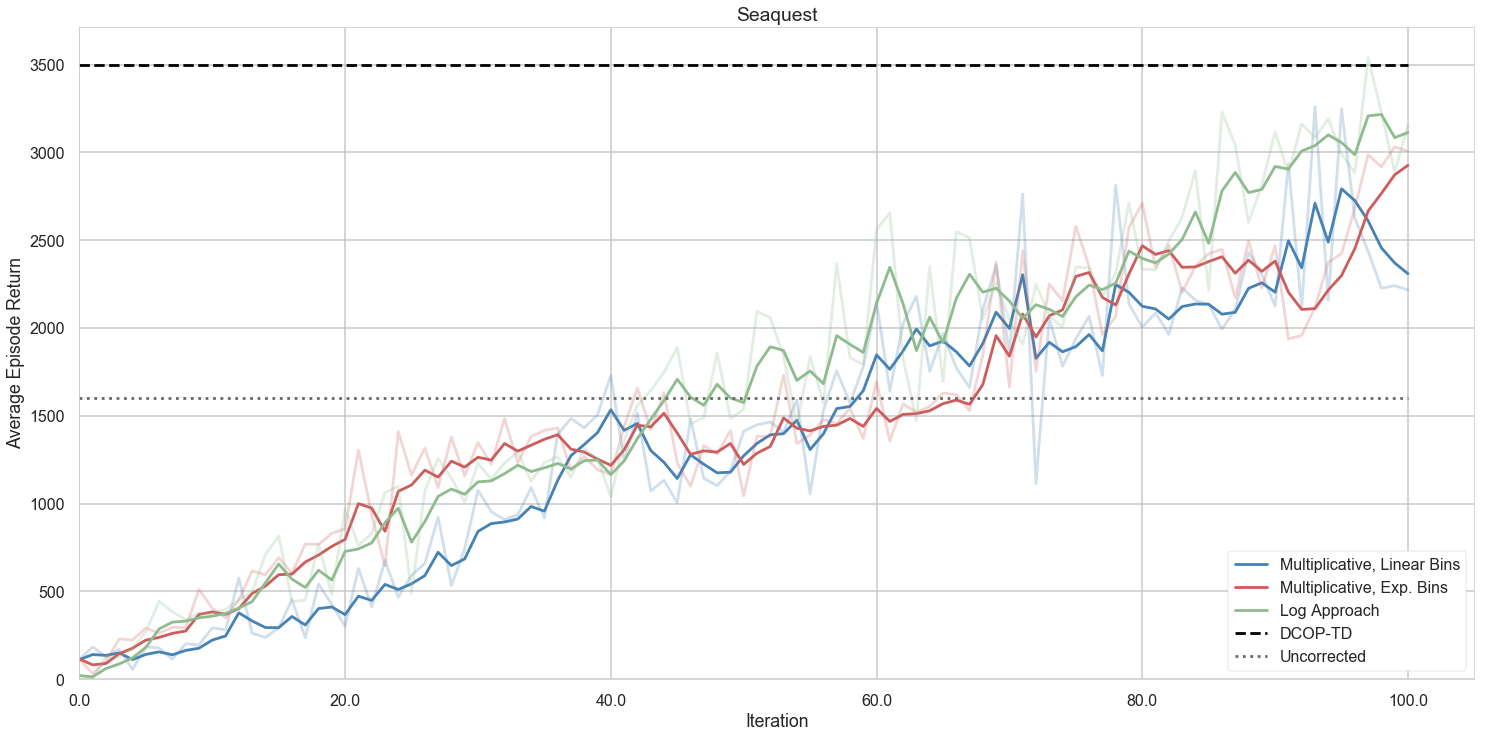

In [6]:
base_dir = './CSVs/'
plot_type = 'AverageEval'
num_iterations = 101
game = 'Seaquest'
approaches = ['MultiplicativeLinear', 'MultiplicativeExp', 'Log']
legends = ['Multiplicative, Linear Bins', 'Multiplicative, Exp. Bins', 'Log Approach']
colors = ['steelblue', 'indianred', 'darkseagreen', 'steelblue']
DCOP = 3500  
uncorrected = 1600
alpha_y = 0.25
alpha_y_smoothed = 1.0
lim_x = (1,1.05)
lim_y = (0,1.05)
size_x = 25 
size_y = 12
training_steps = None

plot_results(base_dir, plot_type,num_iterations, game, approaches, legends, colors, DCOP, uncorrected, alpha_y, alpha_y_smoothed, lim_x, lim_y, size_x, size_y)

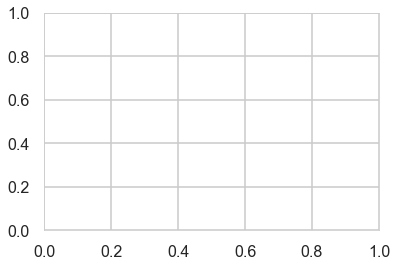

In [33]:
a = float(plt.ylim()[0])+1

## Log Approach

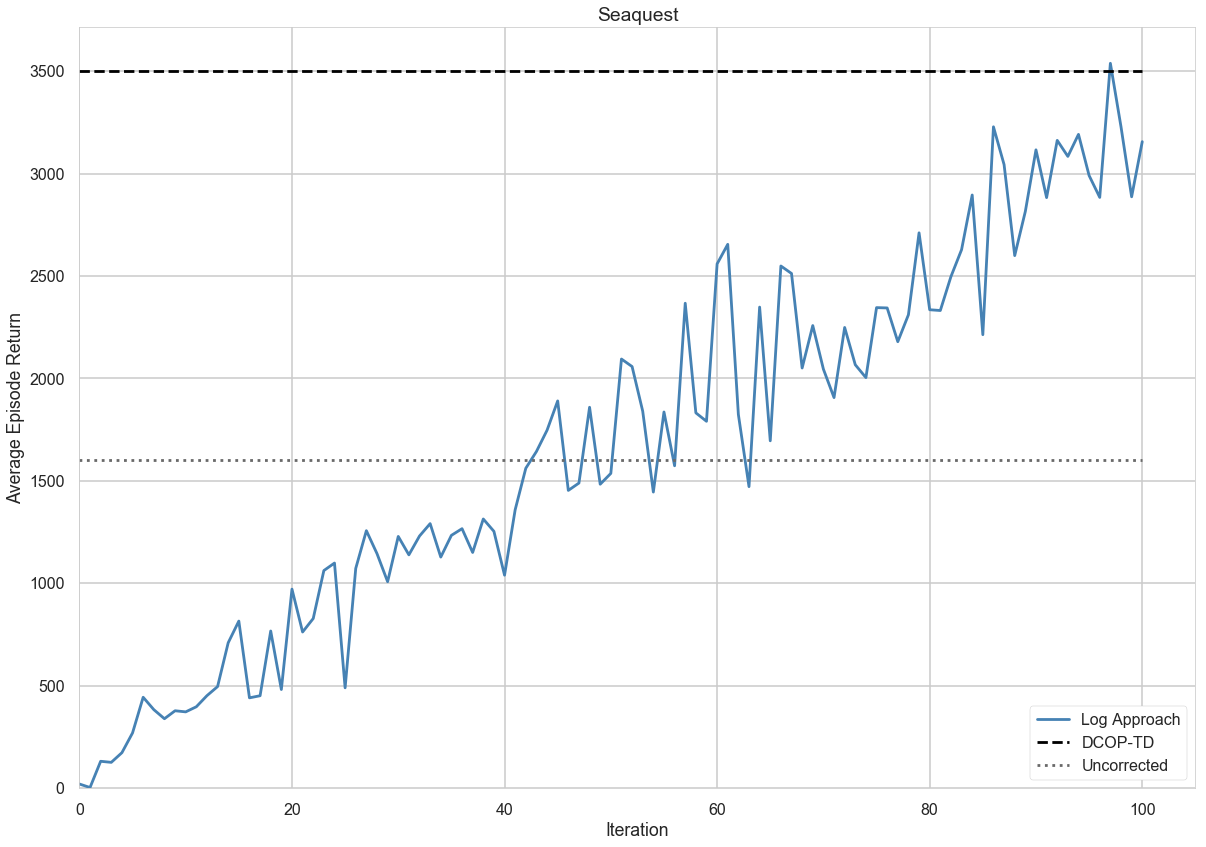

In [34]:
base_dir = './CSVs/'
plot_type = 'AverageEval'
game = 'Seaquest'
approaches = ['Log']
legends = ['Log Approach']
colors = ['steelblue', 'indianred', 'darkseagreen', 'steelblue']
DCOP = 3500  
uncorrected = 1600
alpha_y = 1.0
alpha_y_smoothed = 0.
num_iterations = 101
lim_x = (1,1.05)
lim_y = (0,1.05)
size_x = 20 
size_y = 14

plot_results(base_dir, plot_type,num_iterations, game, approaches, legends, colors, DCOP, uncorrected, alpha_y, alpha_y_smoothed, lim_x, lim_y, size_x, size_y)

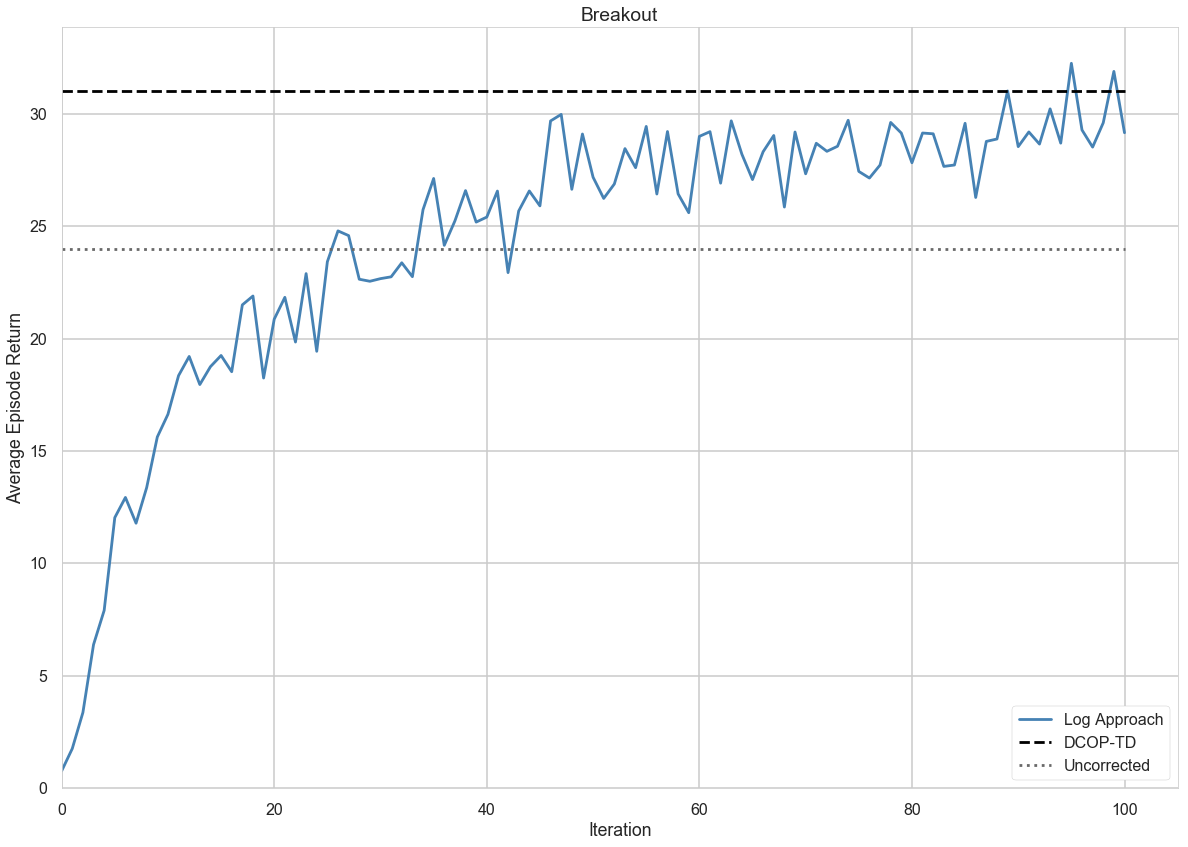

In [35]:
game = 'Breakout'
DCOP = 31  
uncorrected = 24
num_iterations = 101
lim_x = (1,1.05)
lim_y = (0,1.05)

plot_results(base_dir, plot_type,num_iterations, game, approaches, legends, colors, DCOP, uncorrected, alpha_y, alpha_y_smoothed, lim_x, lim_y, size_x, size_y)

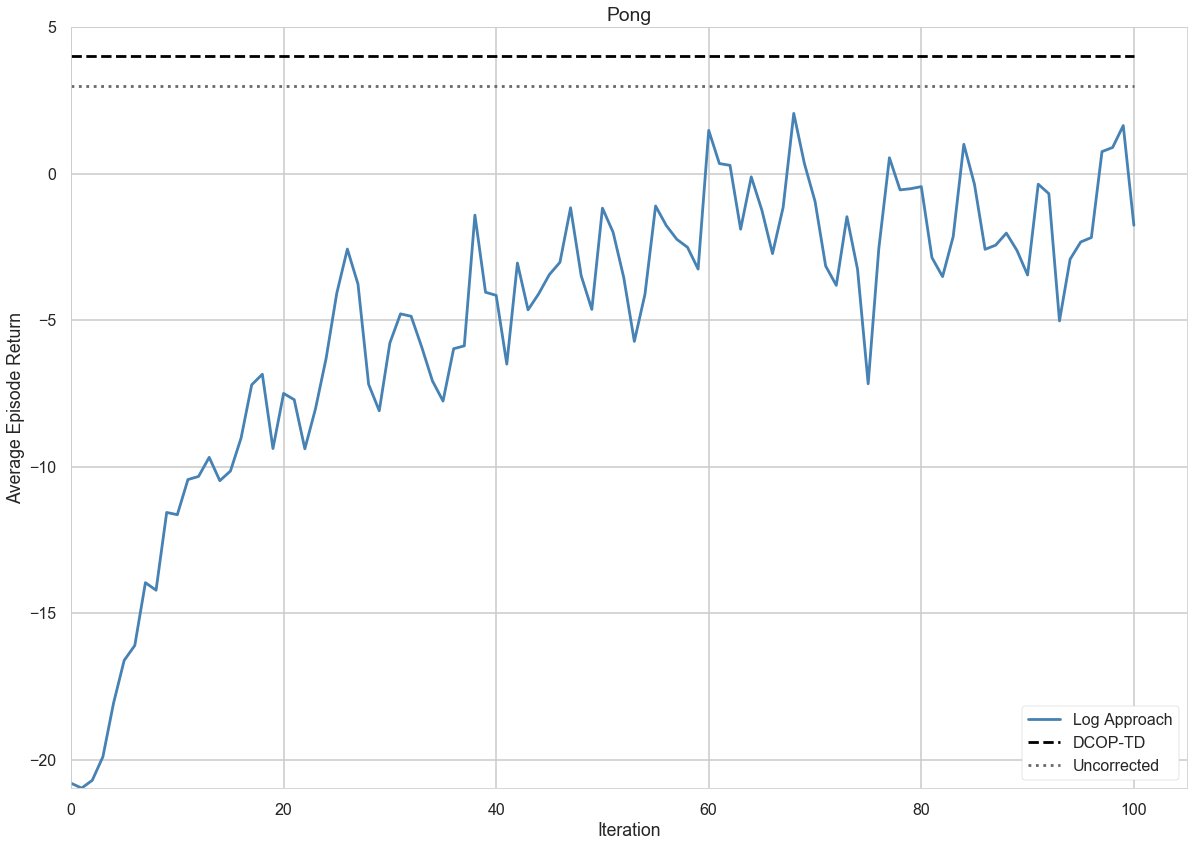

In [36]:
game = 'Pong'
DCOP = 4 
uncorrected = 3
num_iterations = 101
lim_x = (1,1.05)
lim_y = (1,1.25)

plot_results(base_dir, plot_type,num_iterations, game, approaches, legends, colors, DCOP, uncorrected, alpha_y, alpha_y_smoothed, lim_x, lim_y, size_x, size_y)

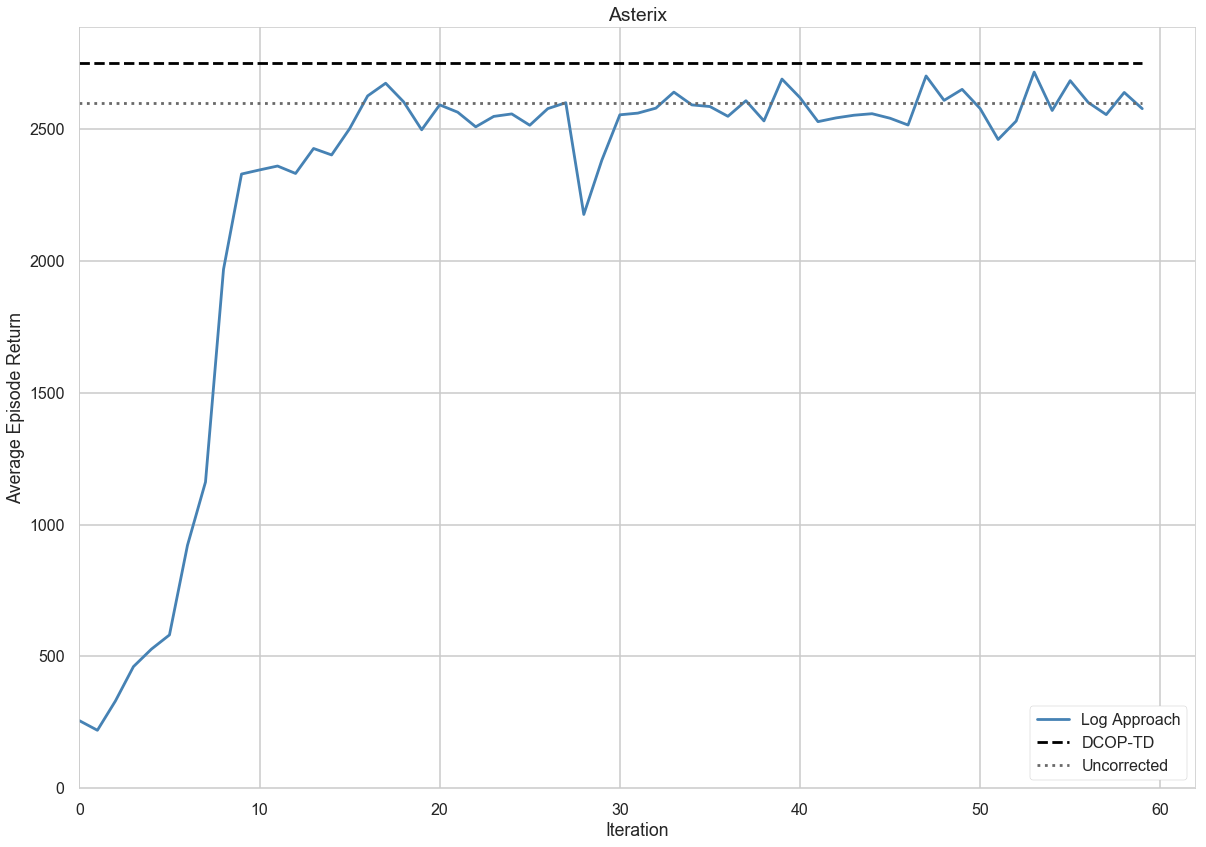

In [37]:
game = 'Asterix'
DCOP = 2750  
uncorrected = 2600
num_iterations = 60
lim_x = (1,1.05)
lim_y = (0,1.05)

plot_results(base_dir, plot_type, num_iterations, game, approaches, legends, colors, DCOP, uncorrected, alpha_y, alpha_y_smoothed, lim_x, lim_y, size_x, size_y)

# Mean Off-policyness

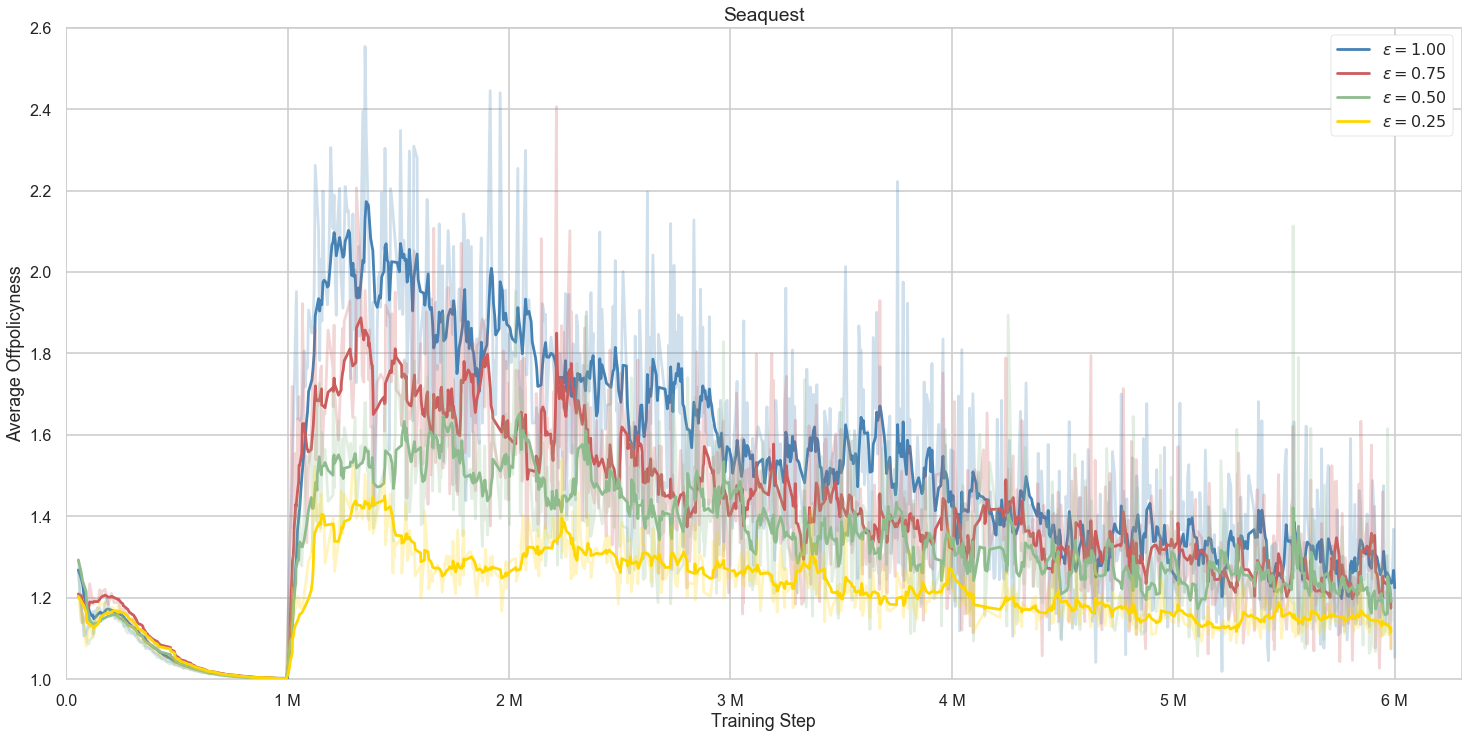

In [12]:
base_dir = './CSVs/'
plot_type = 'MeanOffpolicyness'
num_iterations = 101
game = 'Seaquest'
approaches = ['LogEpsilon1', 'LogEpsilon75', 'LogEpsilon50', 'LogEpsilon25']
legends = [r'$\epsilon = 1.00$', r'$\epsilon = 0.75$', r'$\epsilon = 0.50$', r'$\epsilon = 0.25$']
colors = ['steelblue', 'indianred', 'darkseagreen', 'gold']
DCOP = None 
uncorrected = None
alpha_y = 0.25
alpha_y_smoothed = 1.0
lim_x = (0,1.05)
lim_y = (1,1.019)
size_x = 25 
size_y = 12
smooth_weight = 0.8
training_steps = 6000000
loc_legend = 'upper right'

plot_results(base_dir, plot_type,num_iterations, game, approaches, legends, colors, DCOP, uncorrected, alpha_y, alpha_y_smoothed, lim_x, lim_y, size_x, size_y, 
             smooth_weight=smooth_weight,training_steps=training_steps, loc_legend = loc_legend)